In [1]:
import torch 
torch.cuda.is_available()

True

In [2]:
from datasetutils import mnist 
import pctools as pc

In [3]:
n_epochs = 5
batch_size = 100
architecture = [784, 256, 64, 10]
ir = 0.02
T = 60
lr = 0.02

In [4]:
train_loader, test_loader = mnist(batch_size=batch_size)

In [5]:
net = pc.GPCNet(*architecture, ir=ir, T=T)
optimizer = pc.GPCHebbian(net, lr=lr)

In [6]:
for epoch in range(n_epochs):
    for image, target in train_loader:
        net.infer(target.cuda(), image.cuda())
        optimizer.step()

In [7]:
targets = torch.eye(10)
generated_imgs = net.infer(targets.cuda()).to('cpu')

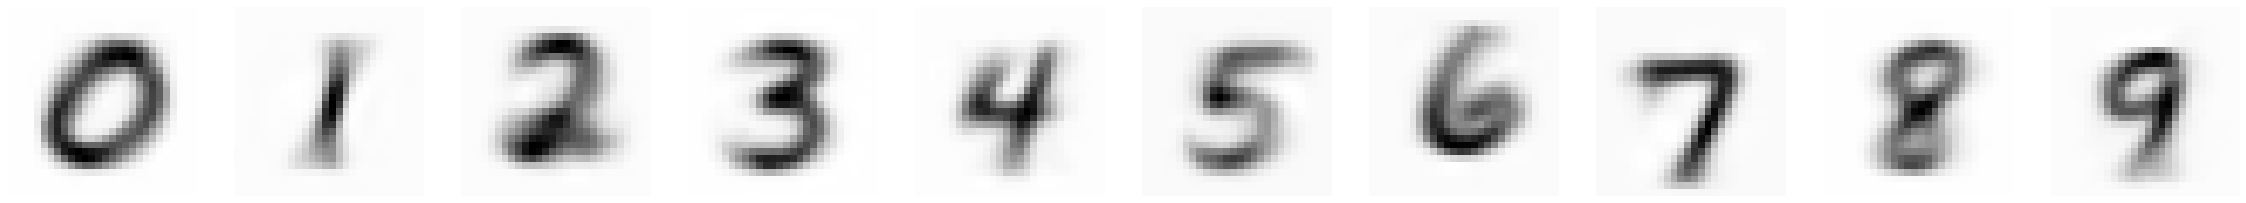

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
fig, axs = plt.subplots(1, 10)
for i in range(10):
    axs[i].imshow(generated_imgs[:,i].reshape(28,28), cmap="Greys")
    axs[i].axis('off')